In [1]:
import tensorflow.compat.v1 as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(x_train , y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

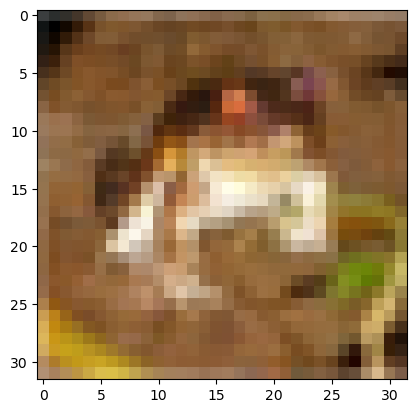

In [6]:
plt.imshow(x_train[0])

In [5]:
x_train = x_train / 255
x_test = x_test/255

In [6]:
from keras import layers
from keras import models
from keras import optimizers

In [7]:
ann = models.Sequential()
ann.add(layers.Flatten(input_shape = (32,32,3)))

ann.add(layers.Dense(3000, activation='relu'))

ann.add(layers.Dense(1000, activation='relu'))

ann.add(layers.Dense(10,activation = "sigmoid"))

In [8]:
ann.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [9]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
ann.fit( x_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.9016 - accuracy: 0.3233
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6765 - accuracy: 0.3982
Epoch 3/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.5848 - accuracy: 0.4337
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.5306 - accuracy: 0.4506
Epoch 5/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4943 - accuracy: 0.4649


In [13]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10, activation='softmax'))

In [16]:
print(cnn.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [12]:
cnn.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [13]:
cnn.fit( x_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4241 - accuracy: 0.4887
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0704 - accuracy: 0.6240
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9195 - accuracy: 0.6797
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8210 - accuracy: 0.7127
Epoch 5/5
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7360 - accuracy: 0.7438


In [14]:
cnn.evaluate(x_test , y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9635 - accuracy: 0.6767


[0.9634547829627991, 0.6766999959945679]

In [17]:
predicted = cnn.predict(x_test)

313/313 [==============================] - 6s 17ms/step


In [18]:
predicted[0]

array([1.6231867e-03, 4.1786314e-04, 5.8101262e-03, 4.2761546e-01,
       1.0010233e-02, 4.3435627e-01, 1.0515438e-01, 1.0501312e-03,
       1.3211350e-02, 7.5090403e-04], dtype=float32)

In [20]:
import numpy as np

In [21]:
np.argmax(predicted[0])

5

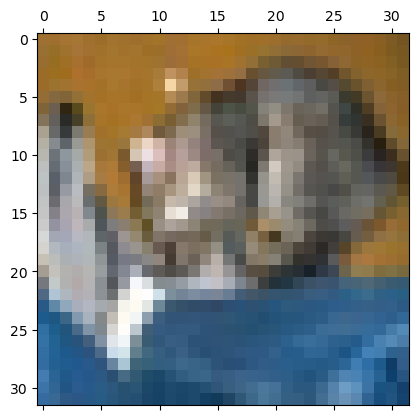

In [22]:
plt.matshow(x_test[0])